In [7]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [8]:
#laoding the dataset
dataset=pd.read_csv('Merged_dataset.csv')
df=dataset.copy()

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,3,158.0,64.0,13.0,387.00000,31.200000,24,0
1,2,105.0,75.0,0.0,0.00000,23.300000,53,0
2,2,146.0,76.0,35.0,194.00000,38.200000,29,0
3,6,134.0,80.0,37.0,370.00000,46.200000,46,1
4,0,107.0,62.0,30.0,74.00000,36.600000,25,1
...,...,...,...,...,...,...,...,...
872,1,96.0,122.0,0.0,0.00000,22.400000,27,0
873,10,101.0,86.0,37.0,0.00000,45.600000,38,1
874,4,207.0,76.0,11.3,156.46706,29.861614,77,1
875,0,141.0,0.0,0.0,0.00000,42.400000,29,1


In [10]:
zero_counts = df.mean()
zero_counts

Pregnancies        3.542759
Glucose          119.142075
BloodPressure     70.386431
SkinThickness     19.324173
Insulin           85.785467
BMI               31.047840
Age               32.940707
Outcome            0.331813
dtype: float64

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,3,158.0,64.0,13.0,387.00000,31.200000,24,0
1,2,105.0,75.0,0.0,0.00000,23.300000,53,0
2,2,146.0,76.0,35.0,194.00000,38.200000,29,0
3,6,134.0,80.0,37.0,370.00000,46.200000,46,1
4,0,107.0,62.0,30.0,74.00000,36.600000,25,1
...,...,...,...,...,...,...,...,...
872,1,96.0,122.0,0.0,0.00000,22.400000,27,0
873,10,101.0,86.0,37.0,0.00000,45.600000,38,1
874,4,207.0,76.0,11.3,156.46706,29.861614,77,1
875,0,141.0,0.0,0.0,0.00000,42.400000,29,1


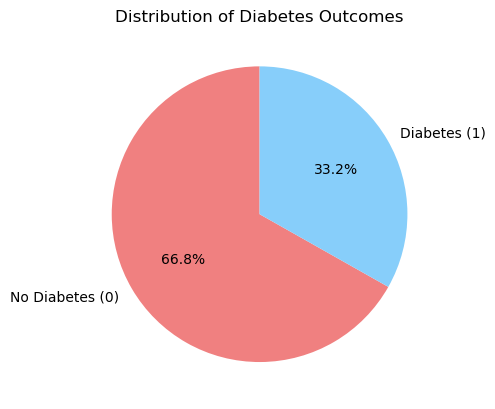

In [12]:
#Visvualization of Outcome column
outcome_column = df['Outcome']
outcome_counts = outcome_column.value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']
colors = ['lightcoral', 'lightskyblue']
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

In [14]:
#Outlier rejection
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(756, 8)

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
1,2,105.0,75.0,0.0,0.0,23.3,53,0
2,2,146.0,76.0,35.0,194.0,38.2,29,0
4,0,107.0,62.0,30.0,74.0,36.6,25,1
5,6,194.0,78.0,0.0,0.0,23.5,59,1
6,9,165.0,88.0,0.0,0.0,30.4,49,1
...,...,...,...,...,...,...,...,...
869,3,126.0,88.0,41.0,235.0,39.3,27,0
870,2,122.0,76.0,27.0,200.0,35.9,26,0
871,5,139.0,64.0,35.0,140.0,28.6,26,0
873,10,101.0,86.0,37.0,0.0,45.6,38,1


In [16]:
#Filling the missing values with the mean except the target column
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in zero_not_accepted:
    df[col]= df[col].replace(0,np.NaN)
    mean = int(df[col].mean(skipna=True))
    df[col] = df[col].replace(np.NaN,mean)

In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
1,2,105.0,75.0,25.0,130.0,23.3,53,0
2,2,146.0,76.0,35.0,194.0,38.2,29,0
4,0,107.0,62.0,30.0,74.0,36.6,25,1
5,6,194.0,78.0,25.0,130.0,23.5,59,1
6,9,165.0,88.0,25.0,130.0,30.4,49,1
...,...,...,...,...,...,...,...,...
869,3,126.0,88.0,41.0,235.0,39.3,27,0
870,2,122.0,76.0,27.0,200.0,35.9,26,0
871,5,139.0,64.0,35.0,140.0,28.6,26,0
873,10,101.0,86.0,37.0,130.0,45.6,38,1


In [18]:
zero_counts = (df == 0).sum()
zero_counts

Pregnancies      142
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
Age                0
Outcome          528
dtype: int64

In [19]:
#Splitting data into train and test
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
#applying SMOTE classification
X = df.iloc[:, [0,1,2,3,4,5,6]].values
y = df.iloc[:, 7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
#standardization
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [22]:
#Machinelearning Algorithms
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [23]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate = 0.05,max_depth = 5 , min_child_weight = 3 , gamma = 0.1 , colsample_bytree = 0.3)
classifier.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
Y_pred_xgb=classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test, Y_pred_xgb)

In [26]:
print("XGBoost: " + str(accuracy_xgb * 100))

XGBoost: 73.02631578947368


In [27]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [29]:
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
ranfor = RandomForestClassifier(n_estimators = 8, criterion = 'gini', random_state = 42)
ranfor.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=8, random_state=42)

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(te)
nb.fit(X_train_resampled, y_train_resampled)

NameError: name 'te' is not defined

In [32]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_nb=nb.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


NameError: name 'nb' is not defined

In [33]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

NameError: name 'Y_pred_nb' is not defined

In [34]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 75.0
K Nearest neighbors: 71.05263157894737


NameError: name 'accuracy_nb' is not defined

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_xgb)
cm

array([[70, 27],
       [14, 41]], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
rc=roc_auc_score(y_test,Y_pred_xgb)

print("\nAccuracy {0} ROC {1}".format(accuracy_xgb,rc))


Accuracy 0.7302631578947368 ROC 0.7335520149953141
